In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load The Dataset
data_dir = '/content/drive/MyDrive/Datasets/Brain_Tumor_Dataset'

In [3]:
os.listdir(data_dir)

['yes', 'no']

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
import cv2
import os

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

In [6]:
img = cv2.imread(os.path.join(data_dir, 'yes', 'y0.jpg'))

In [7]:
img.shape

(348, 287, 3)

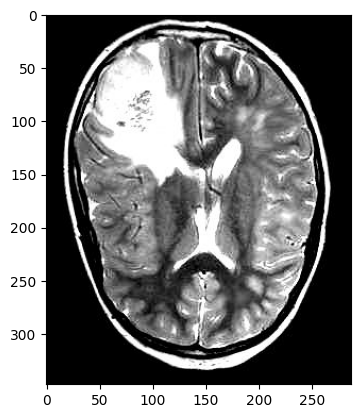

In [8]:
plt.imshow(img)

**LOAD DATA**

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3000 files belonging to 2 classes.


In [10]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [ ]:
#Images represent as numpy arrays (Just testing my batch here that how it looks like in the form of arrays)
batch[0]

According to iterator and our batch
1. Tumor Exist = 1
2. Tumor Not Exist = 0

In [14]:
batch[1]

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

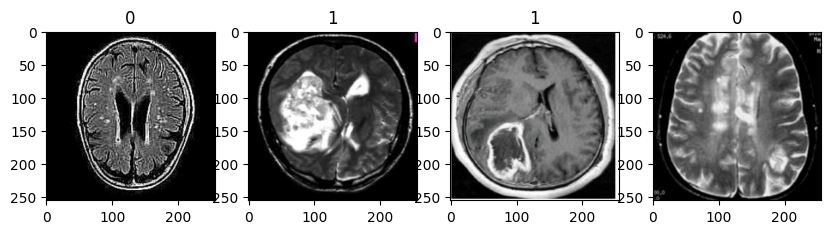

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
batch[0].min()

0.0

In [17]:
batch[0].max()

255.0

In [18]:
scaled = batch[0] / 255

In [ ]:
scaled

**2. PreProcess Data**

Now we will gonna scale our data using a appropriate way for our data pipeline. As we did the same thing above individually just for testing.

**2.2. Scaled Data**

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()[0].max()

1.0

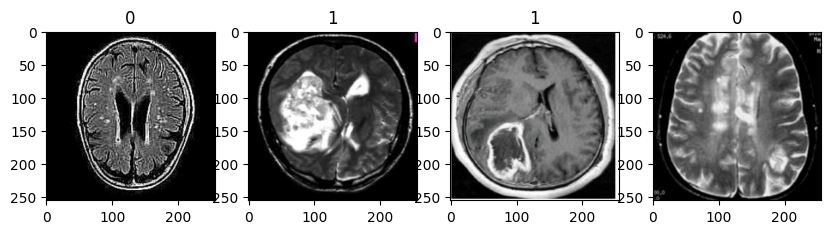

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)

94

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) +1
test_size = int(len(data)*.1) +1

In [25]:
train_size + val_size + test_size

94

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
len(train)

65

###**Deep Learning Model (Convolutional Neural Network)**


**Building Model**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.6937 - loss: 0.5570 - val_accuracy: 0.9030 - val_loss: 0.2371
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - accuracy: 0.9109 - loss: 0.2344 - val_accuracy: 0.9490 - val_loss: 0.1503
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.9546 - loss: 0.1565 - val_accuracy: 0.9770 - val_loss: 0.0970
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9826 - loss: 0.0761 - val_accuracy: 0.9572 - val_loss: 0.1213
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - accuracy: 0.9893 - loss: 0.0510 - val_accuracy: 0.9293 - val_loss: 0.2400
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.9777 - loss: 0.0613 - val_accuracy: 0.9556 - val_loss: 0.1274
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9770 - val_loss: 0.0745
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.9995 - loss: 0.0089 - val_accura

In [ ]:
hist.history

**Plot Performance**

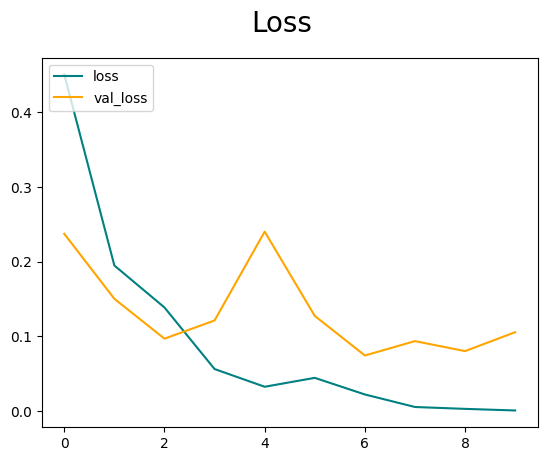

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

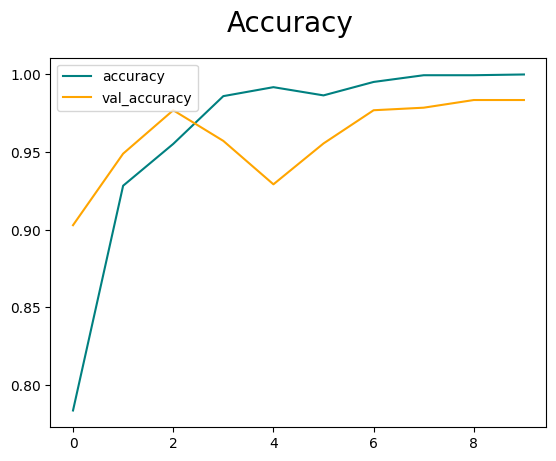

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

###**4. Peformance Evaluations**

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [44]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:0.9934640526771545, Recall:0.9934640526771545, Accuracy:0.9935897588729858


###**Model Testing On Unseen Data**

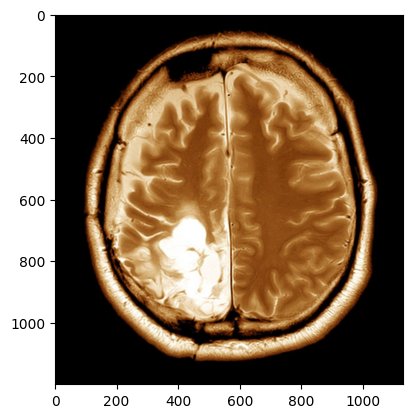

In [77]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Brain_Tumor_Dataset/Unseen images for model testing/bt.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

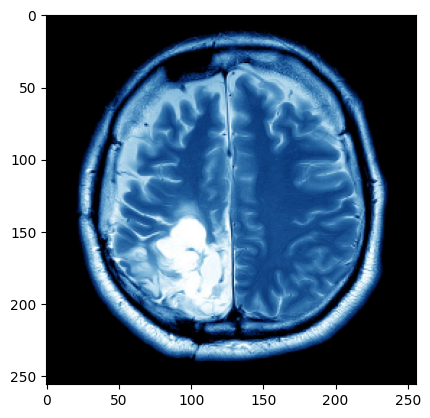

In [78]:
resize = tf.image.resize(img, (256,256))
resized_rgb_img = cv2.cvtColor(resize.numpy().astype('uint8'), cv2.COLOR_BGR2RGB)

plt.imshow(resized_rgb_img)  # Now, only the image is passed to imshow
plt.show()

In [79]:
resized_rgb_img.shape

(256, 256, 3)

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [81]:
yhat

array([[0.9999912]], dtype=float32)

In [82]:
if yhat > 0.5:
    print(f'Predicted class is Brain Tumor Detected')
else:
    print(f'Predicted class has no Brain Tumor')

Predicted class is Brain Tumor Detected
